# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
AnnualCrop_sat = 'DATASET/TRAIN/AnnualCrop_sat'
Bridge_aerial = 'DATASET/TRAIN/Bridge_aerial'
damage = 'DATASET/TRAIN/damage'
Forest_sat = 'DATASET/TRAIN/Forest_sat'
Highway_sat = 'DATASET/TRAIN/Highway_sat'
Industrial_aerial = 'DATASET/TRAIN/Industrial_aerial'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR AnnualCrop_sat:

======== Images in:  DATASET/TRAIN/AnnualCrop_sat
Images_count :	 100
Min_width :	 64
Max_width :	 64
Min_height :	 64
Max_height :	 64



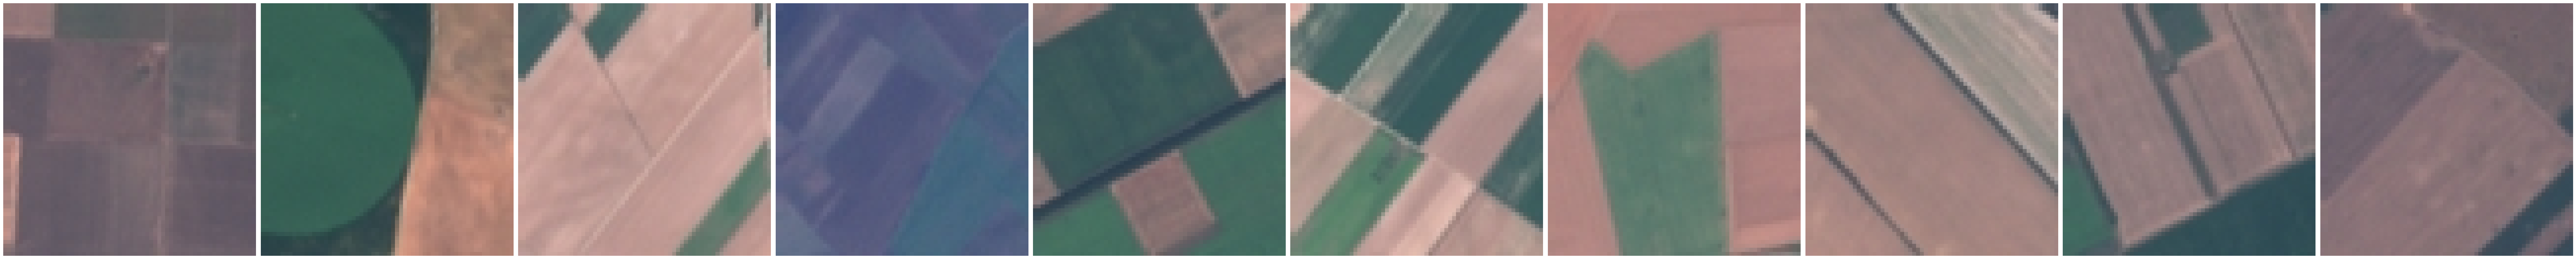

In [5]:
print("")
print("TRAINING DATA FOR AnnualCrop_sat:")
print("")
images_details(AnnualCrop_sat)
print("")
plot_images(AnnualCrop_sat, 10) 


TRAINING DATA FOR Bridge_aerial:

======== Images in:  DATASET/TRAIN/Bridge_aerial
Images_count :	 100
Min_width :	 256
Max_width :	 256
Min_height :	 256
Max_height :	 256



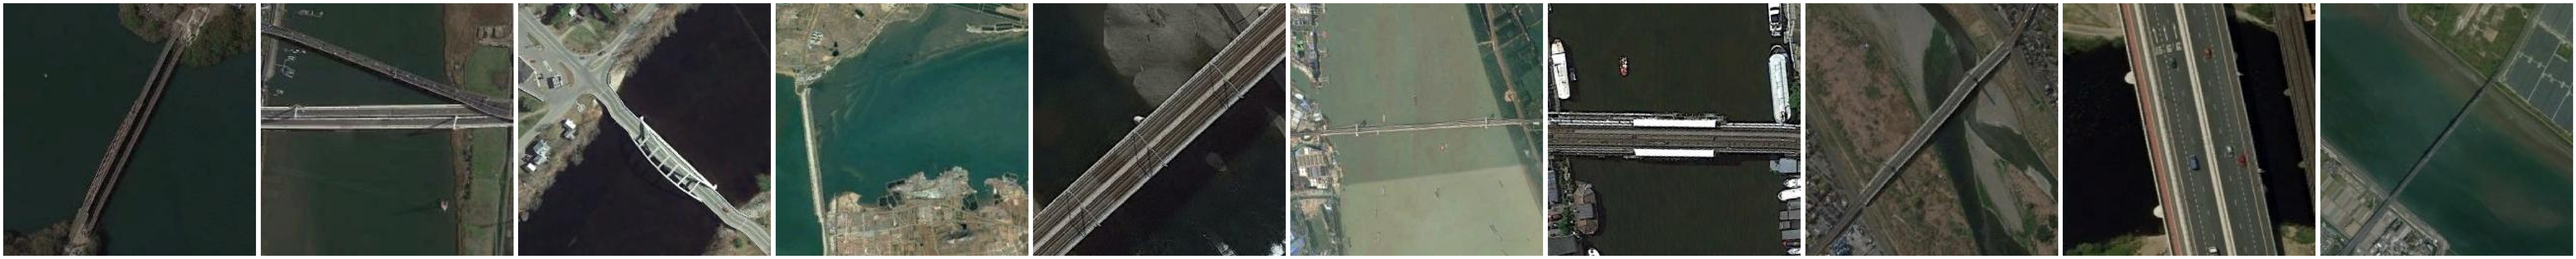

In [6]:
print("")
print("TRAINING DATA FOR Bridge_aerial:")
print("")
images_details(Bridge_aerial)
print("")
plot_images(Bridge_aerial, 10) 


TRAINING DATA FOR damage:

======== Images in:  DATASET/TRAIN/damage
Images_count :	 100
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



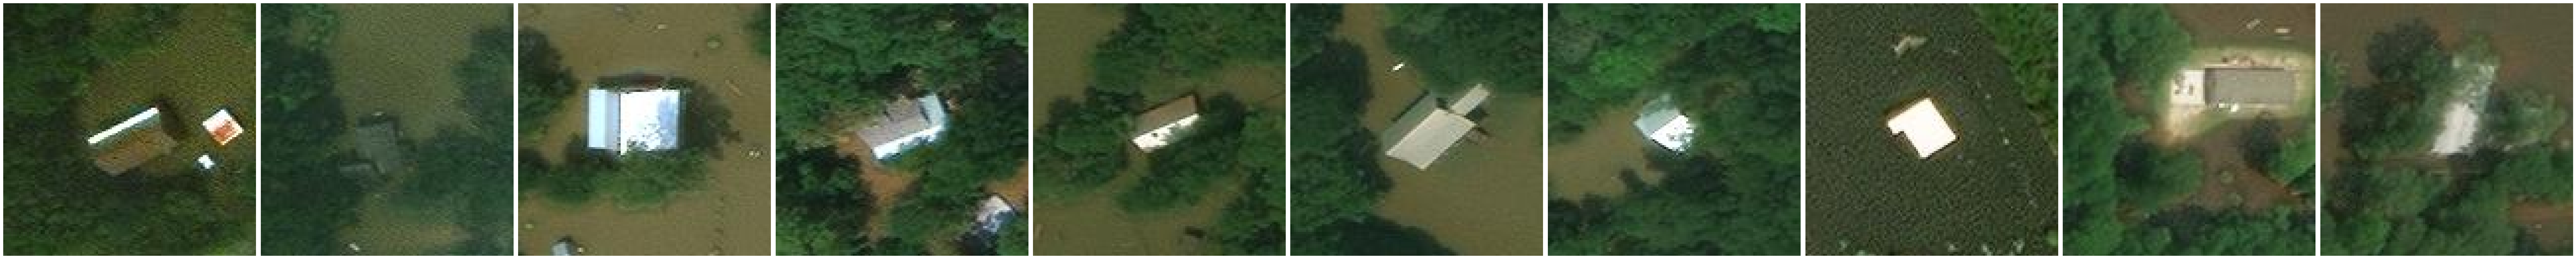

In [7]:
print("")
print("TRAINING DATA FOR damage:")
print("")
images_details(damage)
print("")
plot_images(damage, 10)


TRAINING DATA FOR Forest_sat:

======== Images in:  DATASET/TRAIN/Forest_sat
Images_count :	 100
Min_width :	 64
Max_width :	 64
Min_height :	 64
Max_height :	 64



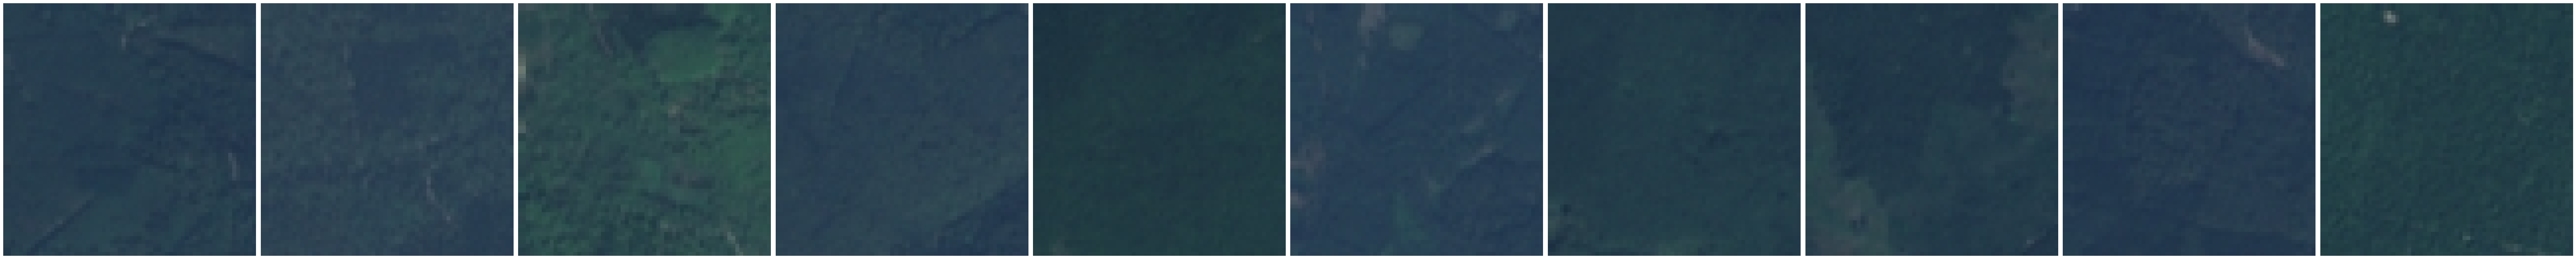

In [8]:
print("")
print("TRAINING DATA FOR Forest_sat:")
print("")
images_details(Forest_sat)
print("")
plot_images(Forest_sat, 10)


TRAINING DATA FOR Highway_sat:

======== Images in:  DATASET/TRAIN/Highway_sat
Images_count :	 100
Min_width :	 64
Max_width :	 64
Min_height :	 64
Max_height :	 64



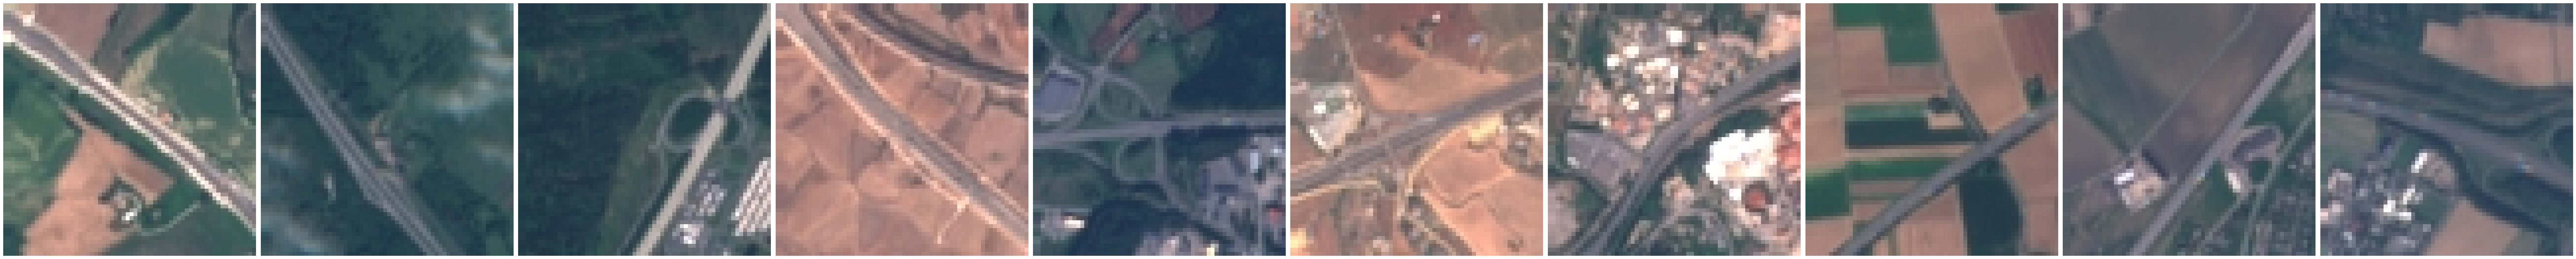

In [9]:
print("")
print("TRAINING DATA FOR Highway_sat:")
print("")
images_details(Highway_sat)
print("")
plot_images(Highway_sat, 10)


TRAINING DATA FOR Industrial_aerial:

======== Images in:  DATASET/TRAIN/Industrial_aerial
Images_count :	 254
Min_width :	 256
Max_width :	 256
Min_height :	 256
Max_height :	 256



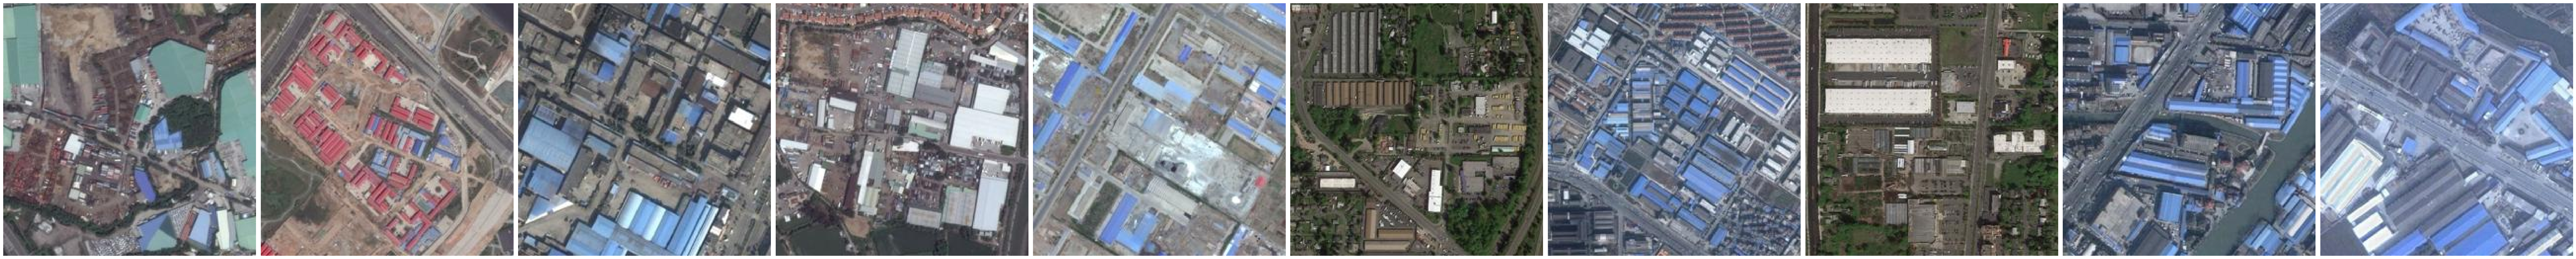

In [10]:
print("")
print("TRAINING DATA FOR Industrial_aerial:")
print("")
images_details(Industrial_aerial)
print("")
plot_images(Industrial_aerial, 10)

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('DATASET/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2506 images belonging to 20 classes.


In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('DATASET/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2506 images belonging to 20 classes.


In [13]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(20, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [15]:
epochs = 10
batch_size = 512

In [16]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


4/4 [==============================] - ETA: 0s - loss: 64.0672 - accuracy: 0.1172
Epoch 1: accuracy improved from -inf to 0.11719, saving model to MANUAL.h5
4/4 [==============================] - 5s 1s/step - loss: 64.0672 - accuracy: 0.1172 - val_loss: 27.5442 - val_accuracy: 0.0234
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 20.0521 - accuracy: 0.0781
Epoch 2: accuracy did not improve from 0.11719
4/4 [==============================] - 4s 1s/step - loss: 20.0521 - accuracy: 0.0781 - val_loss: 8.0465 - val_accuracy: 0.0391
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 3.7726 - accuracy: 0.0938
Epoch 3: accuracy did not improve from 0.11719
4/4 [==============================] - 4s 940ms/step - loss: 3.7726 - accuracy: 0.0938 - val_loss: 2.8553 - val_accuracy: 0.1250
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 2.9052 - accuracy: 0.1250
Epoch 4: accuracy improved from 0.11719 to 0.12500, saving model to MANUAL.

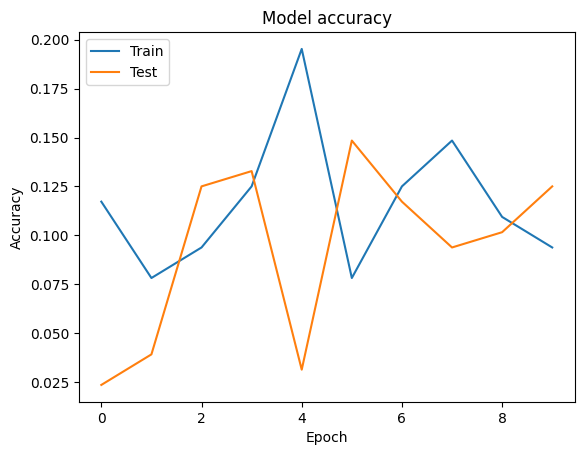

In [17]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

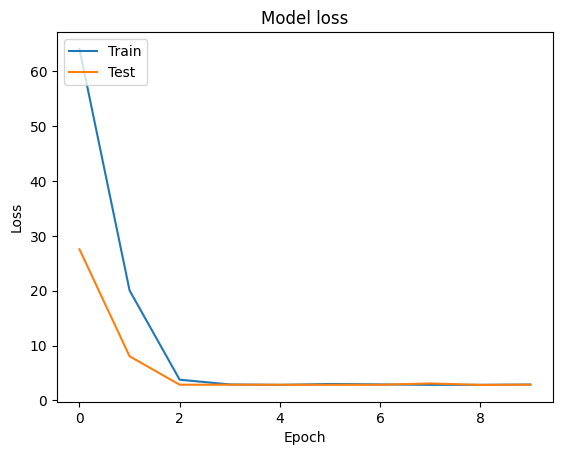

In [18]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()